In [1]:
library("tidyverse")
library("carData")

Warning message:
"package 'tidyverse' was built under R version 4.2.1"
── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.2.1"
Warning message:
"package 'tibble' was built under R version 4.2.1"
Warning message:
"package 'tidyr' was built under R version 4.2.1"
Warning message:
"package 'readr' was built under R version 4.2.1"
Warning message:
"package 'purrr' was built under R version 4.2.1"
Warning message:
"package 'dplyr' was built under R version 4.2.1"
Warning message:
"package 'stringr' was built under R version 4.2.1"
Warning message:
"package 'forcats' was built under R version 4.2.1"
── C

In [2]:
data("Prestige")
data <- Prestige

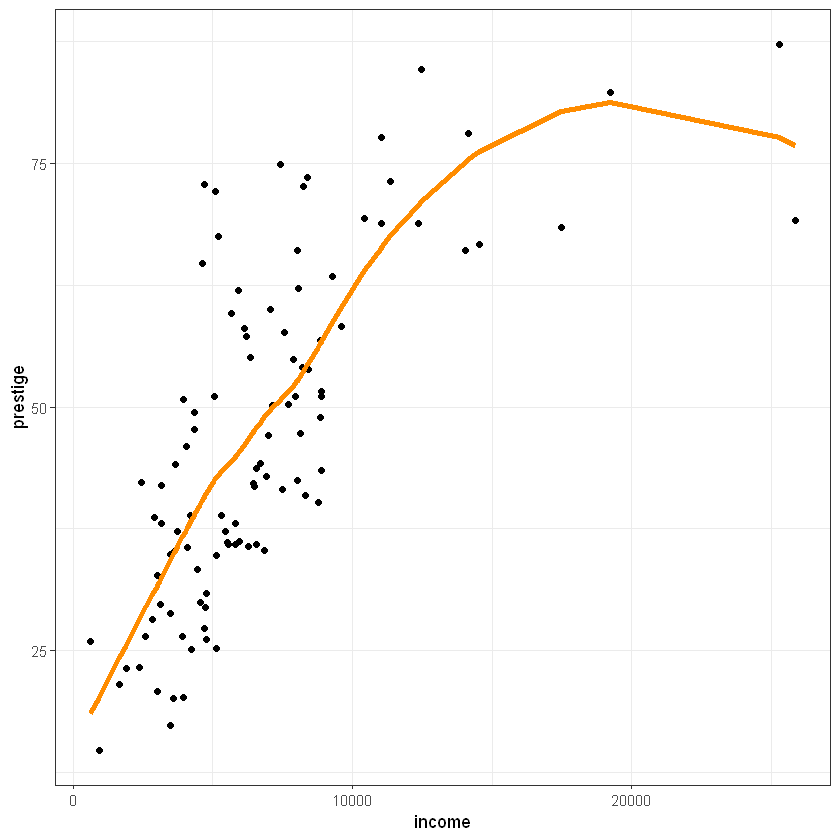

In [3]:
# Fit Loess model.
loess_m1 <- loess(prestige ~ income, data=Prestige)

# Plot model fit and save.
data %>%
    ggplot(aes(x=income, y=prestige)) +
        geom_point() +
        geom_line(
            aes(
                x=sort(income), 
                y=loess_m1$fitted[order(income)]
            ), 
            col="darkorange", lwd=1.5
        ) + 
        theme_bw()

ggsave("./images/r_1.png", width=5, height=5, dpi=100)

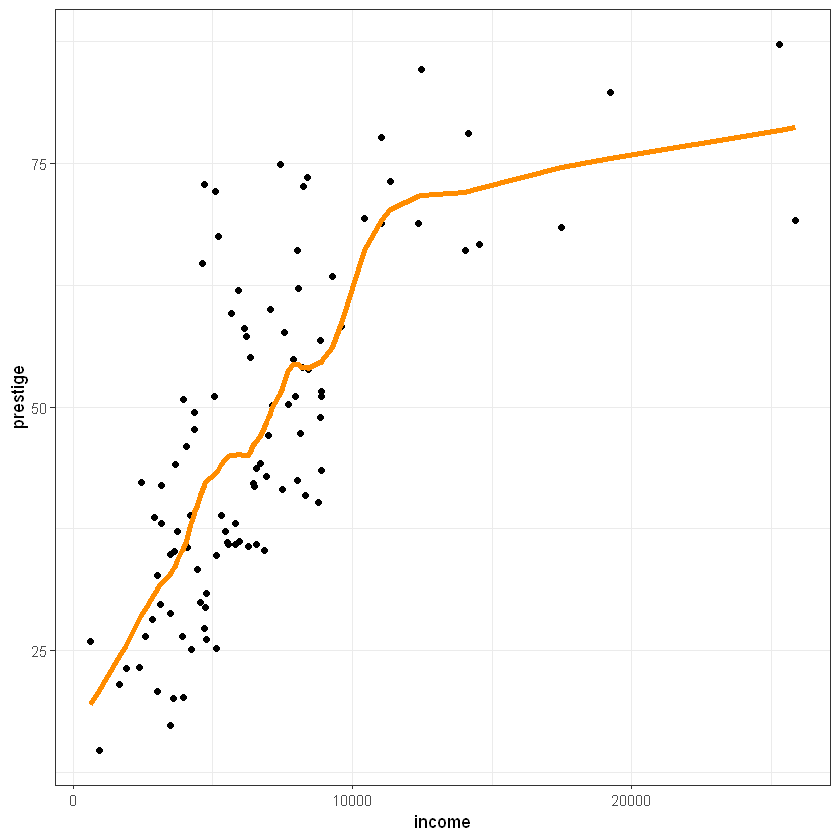

In [4]:
# Fit Loess model.
loess_m1 <- loess(prestige ~ income, data=Prestige, degree=1, span=.3)

# Plot model fit and save.
data %>%
    ggplot(aes(x=income, y=prestige)) +
        geom_point() +
        geom_line(
            aes(
                x=sort(income), 
                y=loess_m1$fitted[order(income)]
            ), 
            col="darkorange", lwd=1.5
        ) +
        theme_bw()

ggsave("./images/r_2.png", width=5, height=5, dpi=100)

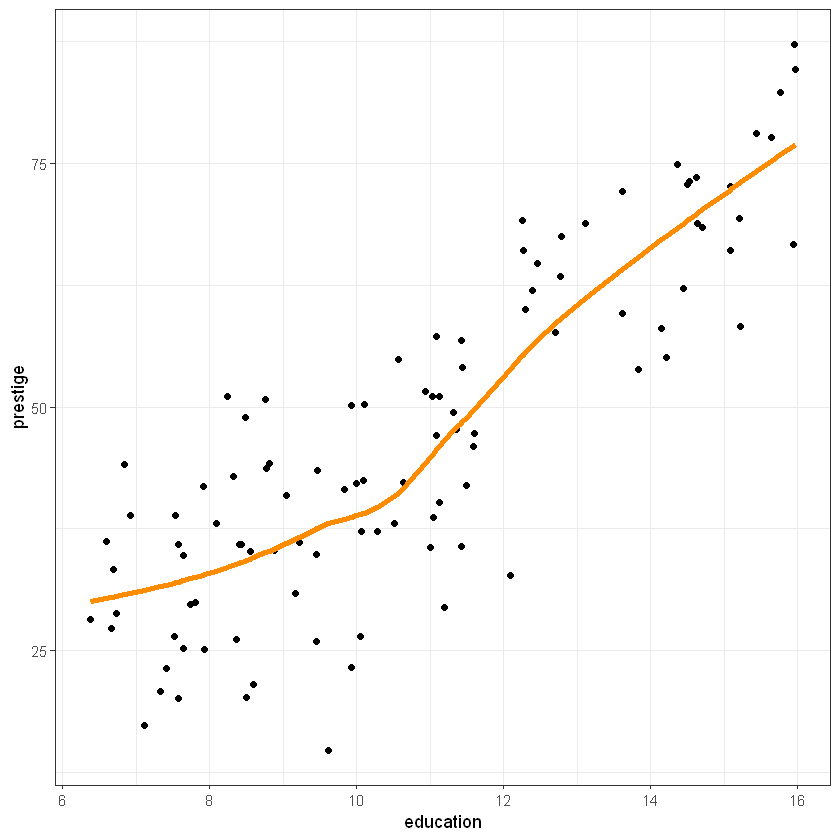

In [5]:
# Fit Loess model.
loess_m2 <- loess(prestige ~ education, data=Prestige)

# Plot model fit and save.
data %>% 
    ggplot(aes(x=education, y=prestige)) +
        geom_point() +
        geom_line(
            aes(
                x=sort(education), 
                y=loess_m2$fitted[order(education)]
            ), 
            col="darkorange", lwd=1.5
        ) +
        theme_bw()

ggsave("./images/r_3.png", width=5, height=5, dpi=100)

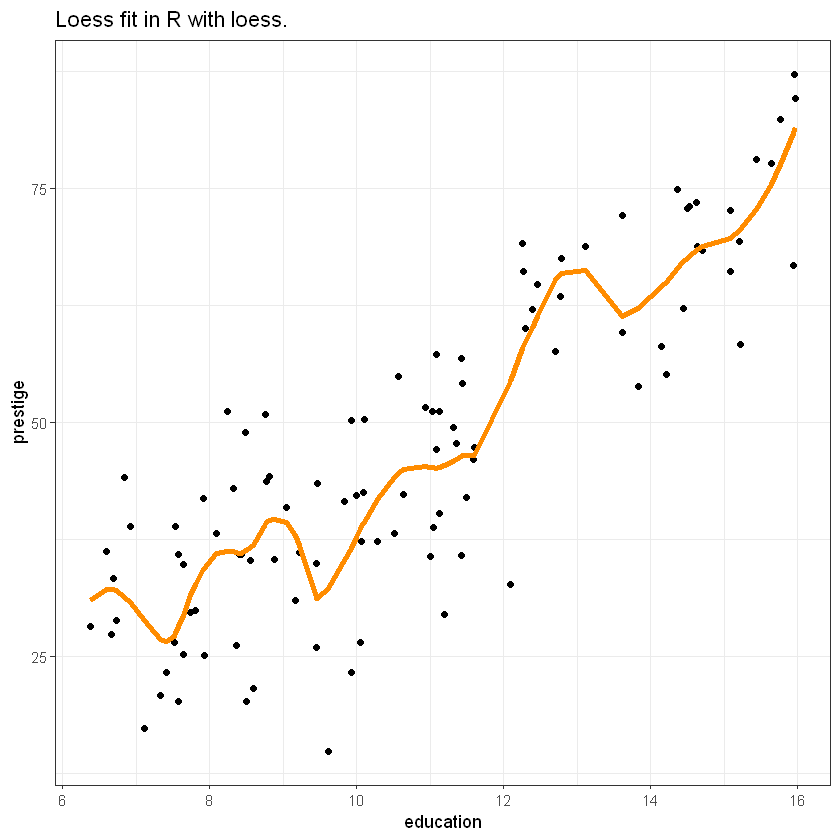

In [6]:
# Fit Loess model.
loess_m2 <- loess(prestige ~ education, data=Prestige, span=.2)

# Plot model fit and save.
data %>% 
    ggplot(aes(x=education, y=prestige)) +
        geom_point() +
        geom_line(
            aes(
                x=sort(education), 
                y=loess_m2$fitted[order(education)]
            ), 
            col="darkorange", lwd=1.5
        ) +
        theme_bw()

ggsave("./images/r_4.png", width=5, height=5, dpi=100)

Call:
loess(formula = prestige ~ income + education, data = Prestige)

Number of Observations: 102 
Equivalent Number of Parameters: 10.52 
Residual Standard Error: 6.925 
Trace of smoother matrix: 12.38  (exact)

Control settings:
  span     :  0.75 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE FALSE
drop.square:  FALSE FALSE 

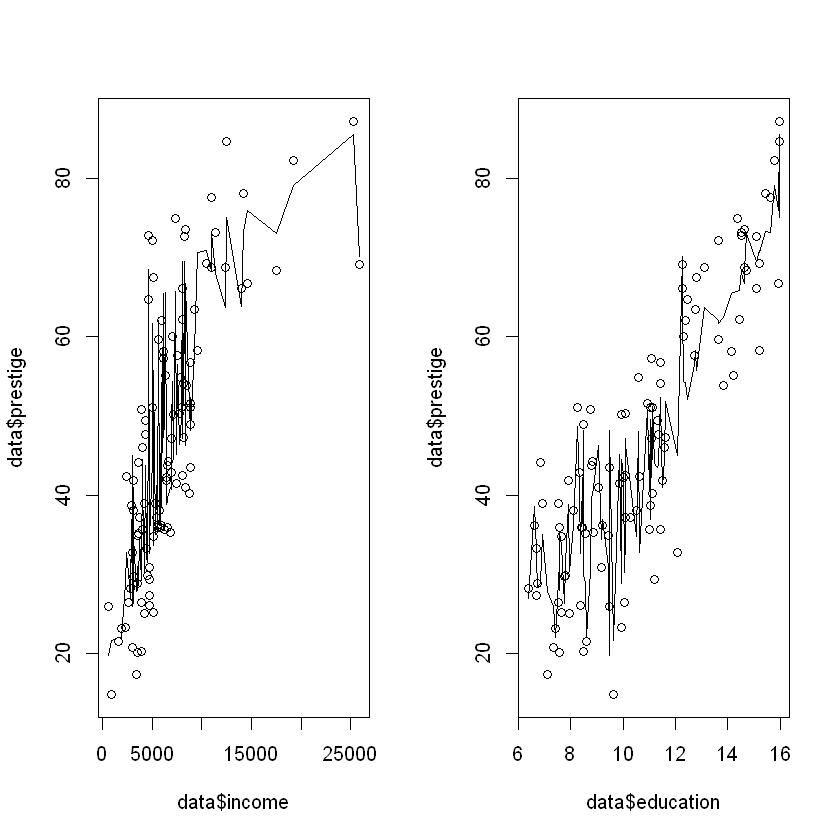

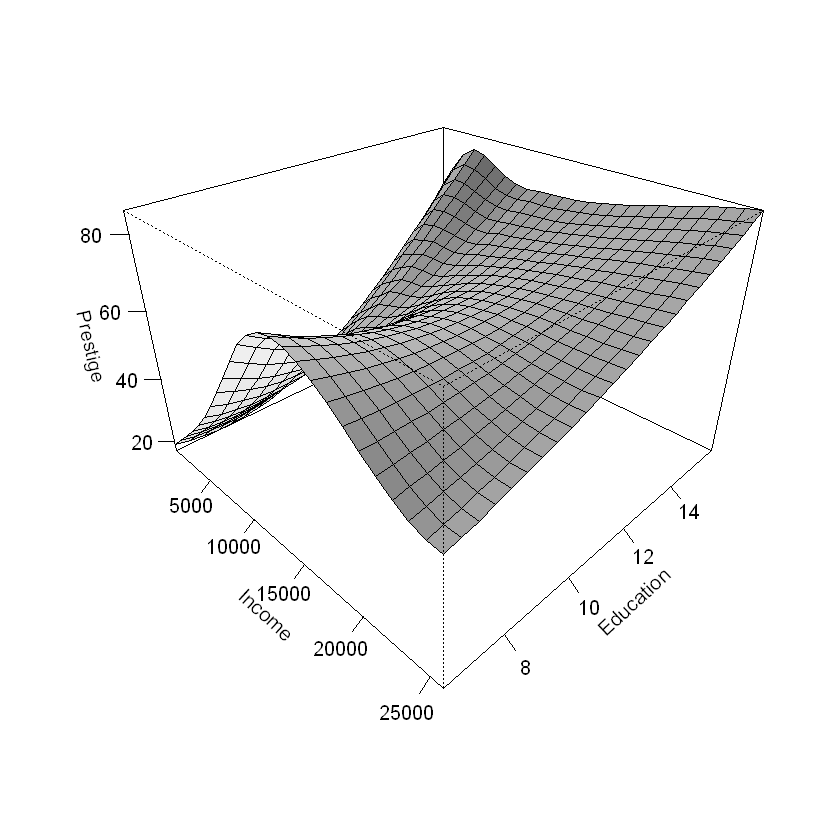

In [7]:
mod.lo <- loess(prestige ~ income + education, data=Prestige)
summary(mod.lo)

predictions <- predict(mod.lo, data[c("income", "education")])
par(mfrow=c(1, 2))
plot(data$income, data$prestige)
lines(sort(data$income), predictions[order(data$income)])
plot(data$education, data$prestige)
lines(sort(data$education), predictions[order(data$education)])

par(mfrow=c(1,1))
inc <- with(Prestige, seq(min(income), max(income), len=25))
ed <- with(Prestige, seq(min(education), max(education), len=25))
newdata <- expand.grid(income=inc, education=ed)
fit.prestige <- matrix(predict(mod.lo, newdata), 25, 25)
persp(inc, ed, fit.prestige, theta=45, phi=30, ticktype="detailed",
      xlab="Income", ylab="Education", zlab="Prestige", expand=2/3,
      shade=0.5)